In [102]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt


In [103]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [104]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [105]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=1200,
    height=600,
    rot=90,
    title='Cryptocurrency Market Data: Returns for Several Holding Periods (%)',
    ylabel= 'Return (%)',
    xlabel='Cryptocurrency Name',
    value_label='Return in the Period (%)'
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (Return in the Period (%))

---

### Prepare the Data

In [106]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data)
scaled_market_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [107]:
# Create a DataFrame with the scaled data
scaled_market_data = pd.DataFrame(scaled_market_data,columns= [ "price_change_percentage_24h","price_change_percentage_7d","price_change_percentage_14d","price_change_percentage_30d","price_change_percentage_60d","price_change_percentage_200d","price_change_percentage_1y"])


# Copy the crypto names from the original DataFrame

scaled_market_data["CryptoName"] = df_market_data.index
# Set the coin_id column as index
scaled_market_data = scaled_market_data.set_index("CryptoName")

# Display the scaled DataFrame
scaled_market_data.tail(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
CryptoName,,,,,,,
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488
ontology,-0.409044,-0.906963,-1.298986,-1.393153,-0.696937,-0.422835,-0.292344
ftx-token,0.414711,0.414044,-0.047386,-0.465380,0.128185,-0.416502,-0.145469
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482


---

In [108]:
# Plot your data to see what's in your DataFrame
scaled_market_data.hvplot.line(
    width=1100,
    height=400,
    rot=90,
    title='Cryptocurrency Market Data Scaled: Standarized Returns for Several Holding Periods (%)',
    ylabel= 'Standarized Return (%)',
    xlabel='Cryptocurrency Name',
    value_label='Standarized Return in the Period (%)'
)


:NdOverlay   [Variable]
   :Curve   [CryptoName]   (Standarized Return in the Period (%))

### Find the Best Value for k Using the Original Scaled DataFrame.

In [109]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))
k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [110]:
# Create an empty list to store the inertia values
inertia =[]

# Create a for loop to compute the inertia with each possible value of k



# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    model = KMeans(n_clusters=i,random_state=0)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(scaled_market_data)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

In [111]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k":k,"inertia":inertia}



# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow 

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


In [112]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve1 = df_elbow .hvplot.line(
    x ="k",
    y = "inertia",
    title = "Elbow Curve", 
    xticks=k
)
elbow_curve1

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** It seems to be 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [113]:
# Initialize the K-Means model using the best value for k
K_Means_Model = KMeans(n_clusters =4,random_state=0)
K_Means_Model

KMeans(n_clusters=4, random_state=0)

In [114]:
# Fit the K-Means model using the scaled DataFrame
K_Means_Model.fit(scaled_market_data)

KMeans(n_clusters=4, random_state=0)

In [115]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
Predictions =K_Means_Model.predict(scaled_market_data)

# Print the resulting array of cluster values.
Predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [116]:
# Create a copy of the scaled DataFrame
copy_scaled_market_data = scaled_market_data.copy()

# Displayed sample data:
copy_scaled_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
CryptoName,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [117]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
copy_scaled_market_data["Cluster"] = Predictions

# Display the copy of the scaled DataFrame
copy_scaled_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
CryptoName,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [118]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot1 = copy_scaled_market_data.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by="Cluster",
    hover_cols = ["coin_id"], 
    title = "Original data scatter plot"
)
scatter_plot1

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

In [119]:
scatter_plot3 = copy_scaled_market_data.hvplot.scatter(
    x = "price_change_percentage_1y",
    y = "price_change_percentage_60d",
    by="Cluster",
    hover_cols = ["coin_id"], 
    title = "Original data scatter plot"
)
scatter_plot3

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_1y]   (price_change_percentage_60d)

In [120]:
#Cailinski Harabasz Score bElbow For Kmeans Cluistering

---

### Optimize Clusters with Principal Component Analysis.

In [121]:
# Create a PCA model instance and set `n_components=3`.
pca_model= PCA(n_components=3)
pca_model 

PCA(n_components=3)

In [122]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame


# down to three principal components.
pca_market_data = pca_model.fit_transform(scaled_market_data)

# View the scaled PCA data
pca_market_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [123]:
# Retrieve the explained variance to determine how much information

# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance

# Print the explained variance for each principal component as a percentage with two decimal points
for i, var in enumerate(explained_variance): 
    print(f"Explained Variance for PC{i+1}: {var:.2%}")


# Calculate and print the sum of the explained variances
explained_variance_sum = sum(explained_variance) 
print(f"Explained Variance Sum: {explained_variance_sum:.2%}")

Explained Variance for PC1: 37.20%
Explained Variance for PC2: 34.70%
Explained Variance for PC3: 17.60%
Explained Variance Sum: 89.50%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components =89.50.98%

In [124]:
# Create a new DataFrame with the PCA data.
pca_market_data_df = pd.DataFrame( pca_market_data,
# Copy the crypto names from the original scaled DataFrame
    index = df_market_data.index,

# Set the coin_id column as index
    columns=['PC1', 'PC2', 'PC3']

# Display the scaled PCA DataFrame
)
pca_market_data_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [125]:
# Create a list with the number of k-values from 1 to 11
k2 =list(range(1,12))
k2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [126]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
 
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k2:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(pca_market_data_df)
    inertia2.append(model.inertia_)

In [127]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k2": k2, "inertia2": inertia2}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca= pd.DataFrame(elbow_data2)

df_elbow_pca.head()

,k2,inertia2
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314


In [128]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve_2 = df_elbow_pca.hvplot.line(
    x="k2",
    y="inertia2",
    title="Elbow Curve 2",
    xticks=k2
    
)

elbow_curve_2

:Curve   [k2]   (inertia2)

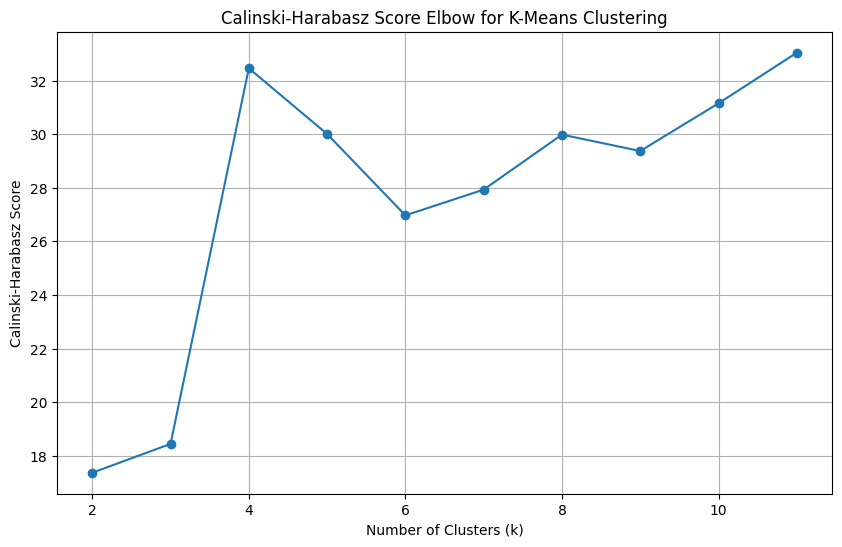

In [129]:
#'Calinski-Harabasz Score Elbow for K-Means Clustering'
# Define the range of 'k' values 
k_values = range(2, 12)

# List to store the Calinski-Harabasz scores 
ch_scores = []
# Loop through the range of 'k' values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)  
    labels = kmeans.fit_predict(scaled_market_data) # Use 'data_scaled' if scaled 
    ch_score = calinski_harabasz_score(scaled_market_data,labels) # Use 'data_scaled' if scaled 
    ch_scores.append(ch_score)   
#Plot the Calinski-Harabasz Score Elbow 
plt.figure(figsize=(10, 6)) 
plt.plot(k_values, ch_scores, marker='o') 
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Calinski-Harabasz Score') 
plt.title('Calinski-Harabasz Score Elbow for K-Means Clustering') 
plt.grid(True) 
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [130]:
# Initialize the K-Means model using the best value for k
model_2 = KMeans(n_clusters=4, random_state=0)

#display model_2
model_2 

KMeans(n_clusters=4, random_state=0)

In [131]:
# Fit the K-Means model using the PCA data
model_2.fit(pca_market_data_df)

KMeans(n_clusters=4, random_state=0)

In [132]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_2 = model_2.predict(pca_market_data_df)

# Print the resulting array of cluster values.
print(clusters_2)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [133]:
# Create a copy of the scaled PCA DataFrame
copy_pca_market_data_df = pca_market_data_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
copy_pca_market_data_df["Crypto Cluster_2"] = clusters_2

# Display the copy of the scaled PCA DataFrame
copy_pca_market_data_df.head()

,PC1,PC2,PC3,Crypto Cluster_2
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [134]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot_2= copy_pca_market_data_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    hover_cols=["coin_id"],
    by="Crypto Cluster_2"
)
scatter_plot_2

:NdOverlay   [Crypto Cluster_2]
   :Scatter   [PC1]   (PC2,coin_id)

In [135]:
scatter_plot_4= copy_pca_market_data_df.hvplot.scatter(
    x="PC2",
    y="PC3",
    hover_cols=["coin_id"],
    by="Crypto Cluster_2"
)
scatter_plot_4

:NdOverlay   [Crypto Cluster_2]
   :Scatter   [PC2]   (PC3,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [136]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
elbow_curve1 + elbow_curve_2

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k2]   (inertia2)

In [137]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

Clusters_short_Term = scatter_plot1 + scatter_plot_4 
Clusters_short_Term


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)
   .NdOverlay.II :NdOverlay   [Crypto Cluster_2]
      :Scatter   [PC2]   (PC3,coin_id)

In [138]:
# code Clusters mix term
Clusters_Mix_Term = scatter_plot3 + scatter_plot_2
Clusters_Mix_Term 

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_1y]   (price_change_percentage_60d)
   .NdOverlay.II :NdOverlay   [Crypto Cluster_2]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The inertia decreased and the data points seem to be less dispersed. Having fewer features to cluster the data seems to reduce ambiguity, which leads to a better interpretation of the results.